In [2]:
# import librarys
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Load the dataset 
df = pd.read_csv('laptop_price.csv', encoding='latin-1')

# Load 10 random items
df.sample(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1086,1101,HP,ZBook 15u,Workstation,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,AMD FirePro W4190M,Windows 7,1.9kg,1495.00
763,772,Asus,Zenbook UX330UA-AH5Q,Ultrabook,13.3,IPS Panel Quad HD+ 3200x1800,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.2kg,1129.00
27,28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
144,147,HP,255 G6,Notebook,15.6,1366x768,AMD A6-Series 9220 2.5GHz,4GB,256GB SSD,AMD Radeon R4 Graphics,Windows 10,1.86kg,369.00
53,54,HP,ProBook 430,Notebook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.49kg,1103.00
473,480,Dell,Latitude 7390,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.42kg,1841.85
1078,1093,Lenovo,V110-15ISK (i5-6200U/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.1kg,540.00
422,429,HP,ProBook 650,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8GB,256GB SSD,Intel HD Graphics 630,Windows 10,2.31kg,1427.00
52,53,HP,255 G6,Notebook,15.6,Full HD 1920x1080,AMD A6-Series 9220 2.5GHz,4GB,256GB SSD,AMD Radeon R4 Graphics,Windows 10,1.86kg,398.49
673,681,Lenovo,IdeaPad 320-15AST,Notebook,15.6,1366x768,AMD E-Series E2-9000 2.2GHz,4GB,128GB SSD,AMD Radeon R2 Graphics,Windows 10,2.2kg,349.00


In [10]:
# Plot1
# Cofigure sunburst plot 
fig = px.sunburst(df, path=['Company','TypeName','Ram'], color='Company',
                  hover_data=['Company'],color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['laptop_ID'], weights=df['laptop_ID']))
fig.show()

In [11]:
# Plot2
# Cofigure scatter plot 
fig = px.scatter(df, x="Cpu", y="Price_euros", color='Company',hover_data=['Company','Product','TypeName'])
fig.show()

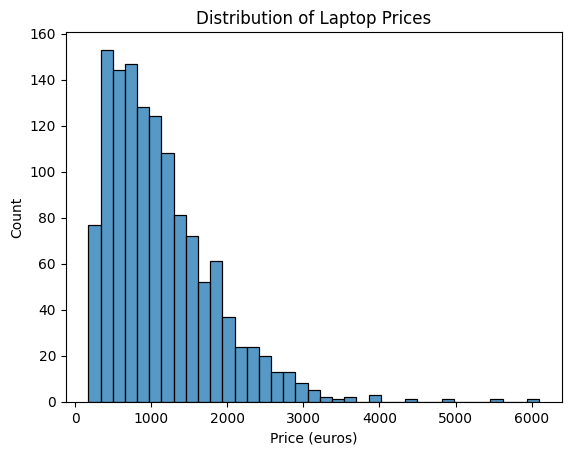

In [12]:
# Plot3
# Cofigure hist plot
sns.histplot(x='Price_euros', data=df)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (euros)')
plt.ylabel('Count')
plt.show()

In [13]:
# Plot4
# Create the heatmap
fig = go.Figure(data=go.Heatmap(z=df['Price_euros'], x=df['Ram'], y=df['Memory']))
fig.show()

In [14]:
# Plot5
# Create the box plot
fig = px.box(df, x="Company", y="Price_euros", points="all")
fig.show()

In [15]:
# Plot6
# Create the pie plot

# Create dataframe with counts of laptops by brand
df_counts = df['Company'].value_counts().reset_index()
df_counts.columns = ['Brand', 'Count']

# Create pie chart
fig = px.pie(df_counts, values='Count', names='Brand', title='Laptops by Brand')
fig.show()

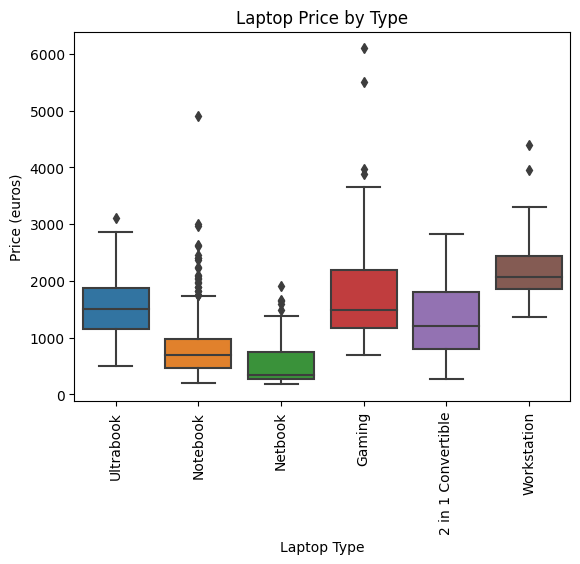

In [16]:
# Plot7
# Cofigure Box plot
sns.boxplot(x='TypeName', y='Price_euros', data=df)
plt.title('Laptop Price by Type')
plt.xlabel('Laptop Type')
plt.ylabel('Price (euros)')
plt.xticks(rotation=90)
plt.show()

In [18]:
# Dataet set cleaninig and feature engineering

# Check for missing values
print(df.isnull().sum())
df.dropna(inplace=True)

# Check for duplicates
df.drop_duplicates(inplace=True)

# turn the Ram and Weight to numerical columns
df['Ram']=df['Ram'].str.replace("GB","")
df['Ram']=df['Ram'].astype(float)

df['Weight']=df['Weight'].str.replace("kg","")
df['Weight']=df['Weight'].astype(float)

# Encode categorical variables
encoder = LabelEncoder()
categorical_cols = ['Company', 'Product', 'TypeName','ScreenResolution', 'Cpu','Memory','Gpu','OpSys']
for col in categorical_cols:
  df[col] = encoder.fit_transform(df[col])

# print the dataset after Cleaning faze
df.head(3)

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,300,4,13.3,23,65,8.0,4,58,8,1.37,1339.69
1,2,1,301,4,13.3,1,63,8.0,2,51,8,1.34,898.94
2,3,7,50,3,15.6,8,74,8.0,16,53,4,1.86,575.00


In [19]:
# Data preparation for ML

# Extract the trget variable
x = df.drop(columns=['Price_euros'])
y = df['Price_euros']

# Scale the data
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.to_frame())

# Split the dataset into training, testing and validation sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# Print shapes of each set
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print("-----------------")

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print("-----------------")

print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")

x_train shape: (781, 12)
y_train shape: (781, 1)
-----------------
x_test shape: (261, 12)
y_test shape: (261, 1)
-----------------
x_val shape: (261, 12)
y_val shape: (261, 1)


In [20]:
# Define the number of folds for K-fold cross-validation
k = 8
kf = KFold(n_splits=k)

# Initialize lists to store MSE values and degrees of polynomial regression model
mse_values = []
degrees = range(1, 7)

# Loop through each degree of the polynomial regression model
for degree in degrees:
    # Initialize the polynomial features object
    poly = PolynomialFeatures(degree=degree)
    
    # Initialize list to store MSE values for each fold
    mse_folds = []
    
    # Loop through each fold of the K-fold cross-validation
    for train_index, val_index in kf.split(x):
        # Split the training and validation sets for this fold
        x_train_fold, y_train_fold = x[train_index], y[train_index]
        x_val_fold, y_val_fold = x[val_index], y[val_index]
        
        # Fit the polynomial features on the training data and transform both the training and validation data
        x_train_poly = poly.fit_transform(x_train_fold)
        x_val_poly = poly.transform(x_val_fold)

        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        
        model.fit(x_train_fold, y_train_fold)
        
        y_val_pred = model.predict(x_val_fold)
        
        # Compute the MSE on the validation data for this fold
        mse_fold = mean_squared_error(y_val_fold, y_val_pred)
        mse_folds.append(mse_fold)
    
    print(f'Dig {degree} : mse vlaus({mse_values})')
    # Compute the mean MSE over all folds for this degree of the polynomial regression model
    mse_mean = np.mean(mse_folds)
    mse_values.append(mse_mean)

Dig 1 : mse vlaus([])
Dig 2 : mse vlaus([0.34592237192896447])
Dig 3 : mse vlaus([0.34592237192896447, 0.25651460930620007])
Dig 4 : mse vlaus([0.34592237192896447, 0.25651460930620007, 0.42490320784798785])
Dig 5 : mse vlaus([0.34592237192896447, 0.25651460930620007, 0.42490320784798785, 302.29467299824785])
Dig 6 : mse vlaus([0.34592237192896447, 0.25651460930620007, 0.42490320784798785, 302.29467299824785, 108.79335374681303])


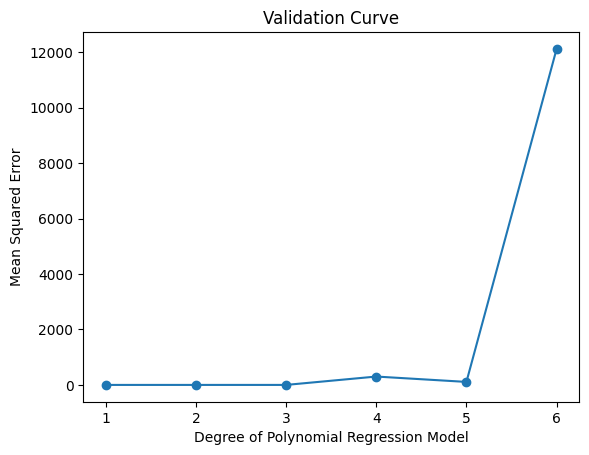

In [21]:
# Plot the MSE values against the degree of the polynomial regression model
plt.plot(degrees, mse_values, '-o')
plt.xlabel('Degree of Polynomial Regression Model')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve')
plt.show()

In [22]:
# Train the polynomial regression model with degree=4 on the combined training and validation data
poly = PolynomialFeatures(degree=2)
X_trainval_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)
poly_reg = LinearRegression()
poly_reg.fit(X_trainval_poly, y_train)

# Evaluate the performance of the polynomial regression model on the test data
y_test_pred = poly_reg.predict(X_test_poly)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print('MSE on test data:', mse)
print('R2 score on test data:', r2)

MSE on test data: 0.296247076570478
R2 score on test data: 0.715235834799447


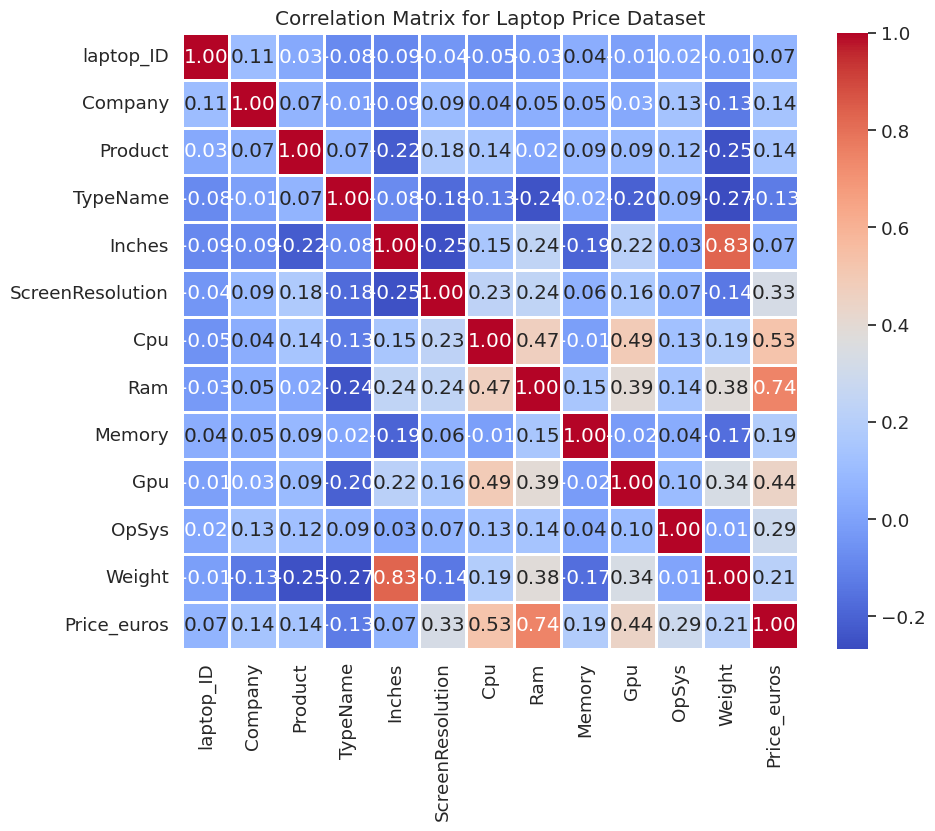

In [23]:
# Use a heatmap plot to show the correlation between the features in this dataset

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, square=True)
plt.title('Correlation Matrix for Laptop Price Dataset')
plt.show()